TP: Apprentissage par renforcement
============

Introduction au sujet
------

L'objectif de ce sujet est d'étudier des techniques d’apprentissage par renforcement sur un jeu simple nommé *Frozenlake*. Nous verrons à travers ce TP les bases de l’utilisation de la librairie `gymnasium`.

Le code est à écrire en python3 à la suite des questions dans ce fichier. 

N'hésitez pas à regarder régulièrement la documentation des librairies, des exemples d'utilisation accompagnent généralement l'explication de chaque fonction.

Langage utilisé:
- Python 3: https://docs.python.org/3/

Librairie de math:
- Numpy: https://docs.scipy.org/doc/numpy/reference/

Librairie d'affichage de données:
- Matplotilb: https://matplotlib.org/contents.html

Librairie de problèmes d’apprentissage par renforcement:
- Gymnasium: https://gymnasium.farama.org/

Commencez par importer les librairies nécessaires au TP.

In [1]:
import numpy as np
import matplotlib.pyplot as plt

import gymnasium as gym
from gymnasium.envs.toy_text.frozen_lake import generate_random_map

import ipywidgets as widgets

#import copy 
import random

#from sklearn.neural_network import MLPRegressor
import torch
from collections import deque

# Présentation de Gymnasium

Gymnasium est une bibliothèque open-source créée à partir de la librairie Gym. Elle est maintenue et développée par la fondation Farama. Elle implémente une grande diversité d’environnements (pendule inversé, jeux Atari, robots…) avec une interface unifiée pour faciliter la comparaison d’algorithmes d’apprentissage par renforcement. Cette bibliothèque est couramment utilisée pour tester des algorithmes de renforcement et est souvent utilisée en combinaison avec la bibliothèque [Stable-Baselines](https://stable-baselines3.readthedocs.io) (que nous n’aborderons pas dans ce TP) qui fournit une implémentation des principaux algorithmes à l’état de l’art.

Dans ce TP, nous allons implémenter un agent évoluant dans l’environnement [Frozen Lake](https://gymnasium.farama.org/environments/toy_text/frozen_lake/). En vous référant à la documentation, écrivez un paragraphe de présentation de cet environnement. Vous préciserez notamment les actions disponibles, les états possibles, les récompenses existantes et les conditions d’arrêts.

Frozen Lake est un environnement de simulation de jeu de plateau. Dans cet environnement, un agent évolue sur une grille de 4x4 cases qui représente un lac gelé, et doit atteindre un objectif spécifique sans tomber dans l'eau gelée. Les actions disponibles pour l'agent sont de se déplacer dans les 4 directions : haut, bas, gauche et droite. Les états possibles correspondent à la position de l'agent sur la grille, qui peut être soit sur la glace, soit dans l'eau. Les récompenses existantes sont de +1 si l'agent atteint l'objectif, 0 si l'agent tombe dans l'eau ou sur la glace sans atteindre l'objectif, et aucun autre type de récompense. Les conditions d'arrêt sont soit lorsque l'agent atteint l'objectif, soit lorsqu'il tombe dans l'eau.

Quelles sont les conséquences de l’attribut `is_slippery` sur l’environnement ? 

L'attribut `is_slippery` contrôle le caractère glissant ou non de l'environnement. S'il est réglé à `True`, l'agent peut glisser et se déplacer dans une direction différente de celle qu'il a choisie avec une certaine probabilité (1/3 de chances d'aller dans la direction qu'il a choisie, et 1/3 de chances d'aller dans chacune des deux autres directions). S'il est réglé à `False`, l'agent se déplace exactement dans la direction qu'il a choisie sans glisser.

Nous allons commencer par générer une carte de jeu au format texte. Pour cela utilisez la fonction `generate_random_map` que vous stockerez dans une variable. Vous construirez une carte de taille $4\times 4$ avec la graine du génératoire aléatoire fixé à 42. Vous mettrez `p` à 0.9 . 

In [2]:
map = generate_random_map(size=4, p=0.9, seed=42)

Affichez le tableau généré par la question précédente. Expliquez à quels types de cases sont associées chaque lettre.

In [3]:
print(map)

['SFFF', 'FHFF', 'FFFH', 'FFFG']


Réponse:

- S (Start) : la case de départ de l'agent
- F (Frozen) : une case gelée sur laquelle l'agent peut se déplacer
- H (Hole) : un trou dans la glace dans lequel l'agent peut tomber et perdre la partie
- G (Goal) : l'objectif que l'agent doit atteindre pour gagner la partie

Nous allons maintenant créer le moteur du jeu. Pour cela créez une variable `env` à l’aide de la fonction [*make*](https://gymnasium.farama.org/api/registry/#gymnasium.make) de `gym`. Vous utiliserez l’environnement `FrozenLake-v1` avec:
- l’attribut `is_slippery` à Faux,
- le `render_mode` sur `human`,
- `desc` contiendra la carte textuelle créée précédemment. 

In [4]:
env = gym.make('FrozenLake-v1', desc=map, map_name="4x4", is_slippery=True, render_mode='human')

En regardant les valeurs des attributs `action_space.n` et `observation_space.n` de la variable `env`, vérifiez que le nombre d’action et d’état sur cet environnement est compatible à la description que vous aviez faite de l’environnement.

In [5]:
print('Nombre d\'actions: ', env.action_space.n)
print('Nombre d\'états: ', env.observation_space.n)

Nombre d'actions:  4
Nombre d'états:  16


Lancez le rendu graphique de l’environnement. Pour cela vous devez tout d’abord initialiser l’environnement avec la méthode `reset` puis lancer le rendu avec `render` (ne fermez pas la nouvelle fenêtre qui s’ouvrira, cela pourrait tuer le kernel python ).

In [6]:
env.reset()
env.render()

Pour effectuer une action il suffit de passer un numéro d’action à la méthode `step`. Effectuez un déplacement vers le bas. Expliquez ce que retourne cette méthode.

In [7]:
env.step(2)

(4, 0.0, False, False, {'prob': 0.3333333333333333})

Lisez le code suivant utilisant la librairie [widget](https://ipywidgets.readthedocs.io/en/stable/) de jupyter et commentez chaque ligne pour indiquer les opérations réalisées.

In [6]:
btn = widgets.Button(description='Ok')
labelWidget = widgets.Label(value = 'Appyer sur OK')
display(btn)
display(labelWidget)
def btn_eventhandler(obj,txt):
    btn.layout.visibility = 'hidden'
    labelWidget.value = txt
btn.on_click(lambda o:btn_eventhandler(o,'OK'))    

Button(description='Ok', style=ButtonStyle())

Label(value='Appyer sur OK')

Après avoir réinitialisé l’environnement écrivez une interface basique à l’aide de 4 boutons et un label pour jouer au jeu associé à l’environnement. Vous afficherez `Perdu` si vous tombez dans l’eau et `Gagné` lorsque le trésor et trouvé. Faite en sorte que les boutons disparaissent en fin de partie.

In [7]:
btnG = widgets.Button(description='Gauche')
btnD = widgets.Button(description='Droite')
btnH = widgets.Button(description='Haut')
btnB = widgets.Button(description='Bas')
labelWidget = widgets.Label(value = 'Appyer sur un bouton')
display(btnG)
display(btnD)
display(btnH)
display(btnB)
display(labelWidget)
def btn_eventhandlerGame(obj, txt):
    if txt == 'Gauche':
        action = 0
    elif txt == 'Bas':
        action = 1
    elif txt == 'Droite':
        action = 2
    elif txt == 'Haut':
        action = 3
    obs, reward, done, info = env.step(action)
    if done:
        if reward == 0:
            labelWidget.value = 'Perdu'
        else:
            labelWidget.value = 'Gagné'
        btnG.layout.visibility = 'hidden'
        btnD.layout.visibility = 'hidden'
        btnH.layout.visibility = 'hidden'
        btnB.layout.visibility = 'hidden'
    else:
        labelWidget.value = 'Appyer sur un bouton'
btnG.on_click(lambda o:btn_eventhandlerGame(o,'Gauche'))
btnD.on_click(lambda o:btn_eventhandlerGame(o,'Droite'))
btnH.on_click(lambda o:btn_eventhandlerGame(o,'Haut'))
btnB.on_click(lambda o:btn_eventhandlerGame(o,'Bas'))

Button(description='Gauche', style=ButtonStyle())

Button(description='Droite', style=ButtonStyle())

Button(description='Haut', style=ButtonStyle())

Button(description='Bas', style=ButtonStyle())

Label(value='Appyer sur un bouton')

Il est possible d’avoir un rendu sous la forme d’image qui pourront être affichés via `matplotlib`. Pour cela il suffit de changer l’attribut `render_mode` lors de la création de l’environnement par `rgb_array`. À l’aide d’une liste d’actions et d’une boucle `for` affichez une séquence d’image permettant d’atteindre le trésor. L’appel à `render` doit être effectué pour générer chaque image.

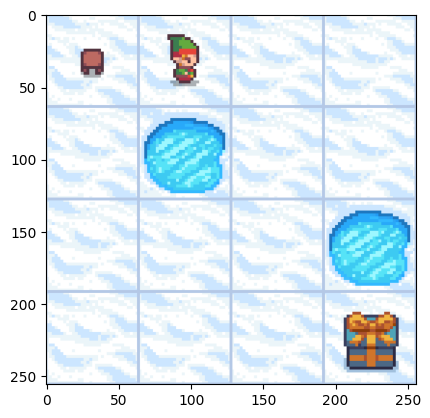

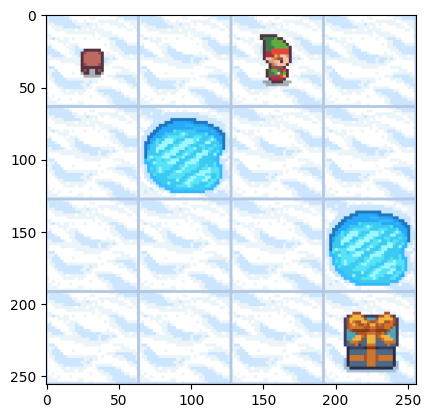

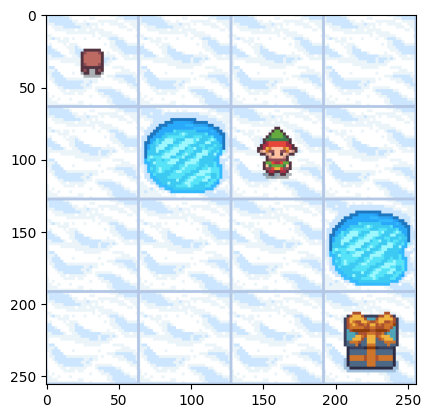

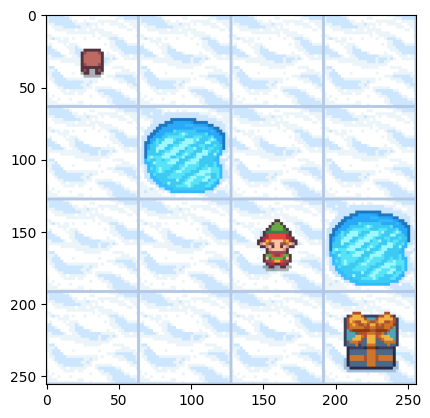

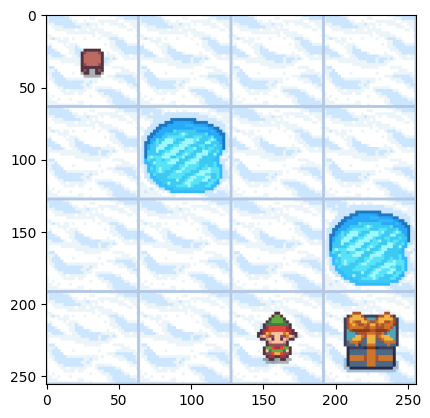

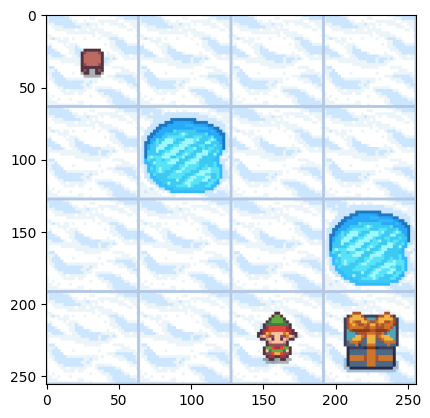

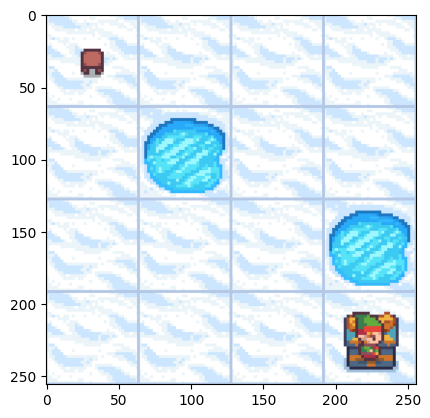

In [8]:
actions = [2, 2, 1, 1, 1, 1, 2 ]
env = gym.make('FrozenLake-v1', desc=map, map_name="4x4", is_slippery=False, render_mode='rgb_array')
env.reset()
for action in actions:
    env.step(action)
    img = env.render()
    plt.imshow(img)
    plt.show()

Dans la suite on pourra utiliser la valeur `None` pour l’attribut `render_mode`, cela permet de ne pas générer de rendu graphique et accéléra les calculs.

# SARSA

Dans cette partie, nous allons implémenter l’algorithme SARSA vu en cours.

Déclarez une classe `Qtable` permettant la gestion d’une QTable . Cette classe aura les méthodes suivantes:
- un constructeur sauvegardant tous les paramètres pour la création de la QTable.
- une méthode `get_qtable` retournant la Qtable courante
- une méthode `get_best_action` prenant l’état courant et l’environnement et retournant la meilleure action à faire en suivant la politique. Si toutes les valeurs de la QTable sont toutes identiques pour l’état courant, l’action est tirée au hasard en utilisant la méthode `sample` de l’`env.action_space`.
- une méthode `reset_qtable` remettant à zéros les valeurs de la qtable. Cette méthode sera appelée par le constructeur.

In [9]:
class Qtable:
    def __init__(self, env):
        self.env = env
        self.qtable = np.zeros((env.observation_space.n, env.action_space.n))
    def get_qtable(self):
        return self.qtable
    def get_best_action(self, state):
        if np.all(self.qtable[state] == self.qtable[state][0]):
            return self.env.action_space.sample()
        else:
            return np.argmax(self.qtable[state])
    def reset_qtable(self):
        self.qtable = np.zeros((self.env.observation_space.n, self.env.action_space.n))

Déclarez une classe `Sarsa` permettant de gérer l’algorithme du même nom. Cette classe héritera de la classe `Qtable`  et aura notamment les méthodes suivantes:
- un constructeur sauvegardant tous les paramètres de l’algorithme.
- une méthode `update` prenant en argument l’état courant, l’état suivant, l’action permettant de passer de l’état courant à l’état suivant, l’action suivante selon la politique et la récompense obtenu lors de la transition entre les deux états. Cette fonction met à jours la Qtable en suivant la règle de mise à jours de SARSA.

In [10]:
class Sarsa(Qtable):
    def __init__(self, env, learning_rate, gamma, epsilon):
        super().__init__(env)
        self.learning_rate = learning_rate
        self.gamma = gamma
        self.epsilon = epsilon
    def update(self, state, next_state, action, next_action, reward):
        self.qtable[state, action] = self.qtable[state, action] + self.learning_rate * (reward + self.gamma * self.qtable[next_state, next_action] - self.qtable[state, action])

Nous allons maintenant coder la stratégie $\epsilon$-gloutonne. Déclarez une classe `EpsilonGreedy` ayant les méthodes suivantes:
- un constructeur sauvegardant la valeur de $\epsilon$ et la QTable à utiliser.
- une méthode `choose_action` prenant en argument l’état courant et l'environnement. Cette méthode retourne l’action à faire suivant l’algorithme $\epsilon$-glouton. Vous pourrez utiliser `sample` de l’environnement pour tirer au hasard une action.

In [11]:
class EpsilonGreedy():
    def __init__(self, epsilon, qtable):
        self.epsilon = epsilon
        self.qtable = qtable
    def choose_action(self, state):
        if np.random.uniform(0, 1) < self.epsilon:
            return env.action_space.sample()
        else:
            return self.qtable.get_best_action(state)

Écrivez une fonction `run_SARSA` effectuant l’algorithme sur 2000 épisodes. Le nombre d’épisode et l’environnement seront des paramètres. La fonction retournera un objet de type `Qtable`.

In [12]:
def run_SARSA(env,total_episodes = 2000,learning_rate= 1e-1,gamma = 0.9,epsilon=0.9):
    sarsa = Sarsa(env, learning_rate, gamma, epsilon)
    espilon_greedy = EpsilonGreedy(epsilon, sarsa)
    for episode in range(total_episodes):
        state = env.reset()[0]
        action = espilon_greedy.choose_action(state)
        done = False
        timeout = False
        while not done and not timeout:
            next_state, reward, done, timeout, _ = env.step(action)
            next_action = espilon_greedy.choose_action(next_state)
            sarsa.update(state, next_state, action, next_action, reward)
            state = next_state
            action = next_action
    return sarsa.get_qtable()
    

Lancez la fonction précédente.

In [13]:
env = gym.make('FrozenLake-v1', desc=map, map_name="4x4", is_slippery=False, render_mode=None)
env.reset()
qtable = run_SARSA(env)

Pour chaque case de la grille, afficher la direction à prendre selon la politique.

In [14]:
directions = {0: "←", 1: "↓", 2: "→", 3: "↑"}
for i in range(4):
    for j in range(4):
        print(directions[np.argmax(qtable[i*4+j])], end=" ")
    print()

↓ → ↓ ← 
↓ ← ↓ ← 
↓ ↓ ↓ ← 
→ → → ← 


# Q-Learning

Nous allons dans cette partie implémenter l’algorithme QLearning en lieu et place de l’algorithme SARSA.

Commencez à définir une classe `Qlearning` héritant de `Qtable`. Cette classe aura notamment les méthodes suivantes:
- un constructeur sauvegardant tous les paramètres de l’algorithme.
- une méthode `update` prenant en argument l’état courant, l’état suivant, l’action permettant de passer de l’état courant à l’état suivant et la récompense obtenu lors de la transition entre les deux états. Cette fonction met à jours la Qtable en suivant la règle de mise à jours du QLearning.

In [15]:
class Qlearning(Qtable):
    def __init__(self, env, learning_rate, gamma, epsilon):
        super().__init__(env)
        self.learning_rate = learning_rate
        self.gamma = gamma
        self.epsilon = epsilon
    def update(self, state, next_state, action, reward):
        self.qtable[state, action] = self.qtable[state, action] + self.learning_rate * (reward + self.gamma * np.max(self.qtable[next_state]) - self.qtable[state, action])

Écrivez une fonction `run_Qlearning` effectuant l’algorithme sur 2000 épisodes. Le nombre d’épisode et l’environnement seront des paramètres. La fonction retournera un objet de type `Qtable`.

In [16]:
def run_Qlearning(env, total_episodes = 2000, learning_rate= 1e-1, gamma = 0.95, epsilon=0.9):
    qlearning = Qlearning(env, learning_rate, gamma, epsilon)
    espilon_greedy = EpsilonGreedy(epsilon, qlearning)
    for episode in range(total_episodes):
        state = env.reset()[0]
        done = False
        timeout = False
        while not done and not timeout:
            action = espilon_greedy.choose_action(state)
            next_state, reward, done, timeout, _ = env.step(action)
            qlearning.update(state, next_state, action, reward)
            state = next_state
    return qlearning.get_qtable()

Pour chaque case de la grille, afficher la direction à prendre selon la politique.

In [17]:
env = gym.make('FrozenLake-v1', desc=map, map_name="4x4", is_slippery=False, render_mode=None)
env.reset()
qtable2 = run_Qlearning(env)

directions = {0: ".", 1: "↓", 2: "→", 3: "↑"}

for i in range(4):
    for j in range(4):
        print(directions[np.argmax(qtable2[i*4+j])], end=" ")
    print()

↓ → ↓ . 
↓ . ↓ . 
↓ ↓ ↓ . 
→ → → . 


# Q-Learning et réseau de neurones

L'objectif de cette partie est de mettre en place un algorithme d'apprentissage de type Q-learning couplé avec un réseau de neurone fessant les prédictions des valeurs de la QTable.

Le code suivant permet de créer un réseau de neurones et de l'entrainer. Nous allons nous en servir pour apprendre une fonction permettant de prédire les valeurs de la QTable. 

In [18]:
class MLPRegressor:
    def __init__(self,
                 state_size,
                 action_size,
                 learning_rate = 1e-2
                ):
        self.net = torch.nn.Sequential(
            torch.nn.Conv2d(1, 16,kernel_size=3,padding=1),
            torch.nn.ReLU(),
            torch.nn.Conv2d(16,8,kernel_size=3),
            torch.nn.ReLU(),
            torch.nn.Flatten(),
            torch.nn.Linear(32,action_size),
        )
       # torch.compile(self.net)
        
        self.criterion = torch.nn.MSELoss()
        self.optimizer = torch.optim.AdamW(self.net.parameters(), lr=learning_rate, amsgrad=True)
    
    def __predict(self,X):
        if X.ndim == 1:
            X = X[None]
        X = X.reshape((-1,1,4,4))
        return self.net(torch.Tensor(X))
    
    def predict_numpy(self,X):
        '''
        Permet de prédire les valeurs de la QTable pour un état donné.
        '''
        with torch.no_grad():
            res = self.__predict(X).numpy()
        return res
    
    def get_best_action(self,X,env=None):
        '''
        Permet de prédire la prochaine action à effectuer pour un état donné en suivant la politique. 
        '''
        with torch.no_grad():
            res =  self.__predict(X)
            res = torch.argmax(res,-1)
            res = res.squeeze().numpy()
        return res
    
    def partial_fit(self,X,a,y):
        '''
        Permet de faire une étape de l'algorihme d'apprentissage. 
        :param X: le ou les états de départ.
        :param a: le ou les actions effectuées.
        :param y: la prédiction de la valeur de la QTable à avoir . 
        '''
        a,y = torch.LongTensor(a),torch.Tensor(y)
        y_pred = self.__predict(X)[torch.arange(len(a)),a]
        loss = self.criterion(y_pred,y)
        self.optimizer.zero_grad()
        loss.backward()
        self.optimizer.step() 
        
        
    def copy(self,net_a_copier):
        '''
        Permet de recopier les poids d'un réseau de neurone dans le réseau courant. 
        '''
        self.net.load_state_dict(net_a_copier.net.state_dict())

Créer un réseau de neurone nommé `policy_net`. En utilisant des valeurs aléatoires, testez les méthodes: 
- partial_fit
- predict_numpy
- get_best_action

Vous pouvez utiliser `numpy` pour générer les valeurs aléatoires utiles à vos tests.

In [19]:
policy_net = MLPRegressor(16,4)
print(policy_net.predict_numpy(np.random.rand(16)))
print(policy_net.get_best_action(np.random.rand(16)))

[[-0.09632194 -0.0021705   0.12670894 -0.04615998]]
2


Déclarez un nouveau réseau que vous nommerez `target_net`, recopiez les poids de `policy_net` dans ce nouveau réseau. 

In [20]:
target_net = MLPRegressor(16,4)
target_net.copy(policy_net)

Ecrivez une fonction prenant en argument une carte qui a été généré par `generate_random_map` et retournant une liste des cases de la carte avec:
- un 0 pour la case de départ et pour les cases gelées,
- un -1 pour les trous,
- un 1 pour le trésor.

In [21]:
def map_to_state(map):
    res = []
    for i in range(len(map)):
        for j in range(len(map[i])):
            if map[i][j] == "S" or map[i][j] == "F":
                res.append(0)
            elif map[i][j] == "H":
                res.append(-1)
            elif map[i][j] == "G":
                res.append(1)
    return res

Testez votre fonction avec la carte correspondant à la graine 42.

In [22]:
map_convert_test = map_to_state(map)
print(map_convert_test)

[0, 0, 0, 0, 0, -1, 0, 0, 0, 0, 0, -1, 0, 0, 0, 1]


Écrivez une fonction prenant en argument un vecteur représentant une carte de la question précédente et un état et retournant la même carte avec un 2 à la position du joueur. 

In [23]:
def state_to_map(state,map):
    res = map.copy()
    res[state] = 2
    return res

Testez votre fonction avec l'état 6.

In [24]:
state_to_map_test = state_to_map(6,map_convert_test)
print(state_to_map_test)

[0, 0, 0, 0, 0, -1, 2, 0, 0, 0, 0, -1, 0, 0, 0, 1]


Écrivez une classe `ReplayMemory` permettant de gérer un espace mémoire. Cette classe aura les méthodes suivantes: 
- `push` permet de stocker dans la mémoire une **transition** composée d'un état, l'état suivant, l'action permettant de passer d'un état à l'autre et la récompense obtenue.
- `sample` permet de tirer au hasard `batch_size` éléments. Vous pouvez utiliser la fonction [random.sample](https://docs.python.org/3/library/random.html#random.sample).
- `__len__` permet de connaitre le nombre d'éléments dans la mémoire.

In [25]:
class ReplayMemory:
    def __init__(self,batch_size):
        self.batch_size = batch_size
        self.memory = []

    def push(self, state,new_state,action,reward):
        self.memory.append((state,new_state,action,reward))

    def sample(self):
        return random.sample(self.memory,self.batch_size)

    def __len__(self):
        return len(self.memory)

Testez les méthodes de la classe précédente.

In [26]:
# Création de la mémoire avec un batch_size de 2
memory = ReplayMemory(2)
# Ajout de plusieurs transistions
memory.push(0,1,3,0)
memory.push(1,2,3,0)
memory.push(2,3,3,0)

# Affichage du nombre d’éléments dans la mémoire
print(memory.__len__())

# Récupération de 2 élémentds aléatoires + vérification des tailles.
print(memory.sample())
print(memory.__len__())


3
[(2, 3, 3, 0), (1, 2, 3, 0)]
3


En vous référant au cours, écrivez une fonction calculant la valeur attendue $y_j$ de la QTable. Cette fonction prendra en arguments: 
- des transitions (issu de ReplayMemory),
- un réseau de neurone ($\hat{Q}$),
- la valeur $\gamma$.

Elle retournera:
- les états initiaux (contenu dans chaque transition),
- les actions (contenu dans chaque transition),
- $y$ les labels à prédir pour chaqe transition.

In [27]:
def compute_true_labels(transitions,target_net,gamma):
    x = np.array([])
    a = np.array([])
    y = np.array([])
    for transition in transitions:
        np.append(x,transition[0])
        np.append(a,transition[2])
        np.append(y,transition[3] + gamma * np.max(target_net.predict_numpy(np.array(transition[1]))))
    print(y)
    return x,a,y

Écrivez l'algorithme d'apprentissage en entier.

In [28]:
def run(total_episodes = 200, C = 20, gamma = 0.9, epsilon=0.9, learning_rate = 1e-2, batch_size = 32, size_map  = 4):
    
    # création du réseau policy_net et target_net.
    policy_net = MLPRegressor(16,4)
    target_net = MLPRegressor(16,4)

    # les poids de policy_net sont recopié dans target_net.
    target_net.copy(policy_net)

    # initialisation du compteur de mise à jours de target_net
    count_update_target = 0
    
    # Creation de la mémoire
    memory = ReplayMemory(batch_size)
    
    # Création de l’objet gérant la stratégie epsilon-gloutonne. On utilisera policy_net pour choisir la politique.
    strategy = EpsilonGreedy(epsilon,policy_net)

    # Création de l’environnement. On utilisera toujours la même carte (seed 42) pour des raisons de temps de calcul mais il est possible de la changer à chaque itération de la boucle.
    map = generate_random_map(size=size_map, p=0.9, seed=42)
    env = gym.make('FrozenLake-v1', desc=map, map_name="4x4", is_slippery=False, render_mode=None)
    
    # Vous utiliserez l’argument max_episode_steps de gym.make à 12 pour limiter à 12 coups max les parties pour réduire le temps de calcul.
    env._max_episode_steps = 12
    
    # Conversion de la carte en vecteur pour le réseau.
    map_convert = map_to_state(map)
    
    
    # Boucle sur les épisodes
    for i_episode in range(total_episodes):
        # Réinitialisation de l’environnement
        state = env.reset()
       # print(state)
    
        # Ajout de la position inital au vecteur représentant l’environnement pour le réseau.
        state = state_to_map(state[0],map_convert)
        #print(state_map_convert)

        # Boucle de jeu. Se finit lorsque le joueur ne peut plus jouer.
        done = False
        while not done:
            # Choisir une action avec la stratégie epsilon-gloutonne
            #print('state : ',type(state))
            action = strategy.choose_action(torch.Tensor(state))
           # print('action',action)

            # Effecture l’action sur l’environnement
            next_state, reward, terminated, truncated, _ = env.step(action.item())

            done = terminated or truncated
            
            if terminated:
                next_state = None
            else:
                # Calcul du vecteur contenant la position du joueur pour le prochain état.
                next_state = state_to_map(next_state,map_convert)
              #  print("next_state", next_state)
                # Stockage de la transition dans la mémoire
                memory.push(state,next_state,action,reward)
            
            
            if len(memory) > batch_size:
                # On récupére un batch de transitions.
                transitions = memory.sample()

                # On calcul les labels associés au batch.
                x,a,y = compute_true_labels(transitions,target_net,gamma)

                # On met à jours le réseau de neurone policy_net.
                policy_net.partial_fit(x,a,y)

                
            # L’état présent devient le nouvel état.
            state = next_state

            
            # on incrémente le compteur de mise à jours et on met à jours le réseau target_net avec les poids de policy_net si on a fait plus de C itérations.
            count_update_target += 1
            if count_update_target > C:
                target_net.copy(policy_net)
                count_update_target = 0
            
            
            
    return policy_net
    

Lancez la fonction précédente. En fonction des paramètres choisis, cela peut prendre un certain temps.

In [29]:
policy_net = run(total_episodes = 200, C = 20, gamma = 0.9, epsilon=0.9, learning_rate = 1e-2, batch_size = 32, size_map  = 4)

[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[

Testez le réseau final obtenu pour chaque état possible.

In [ ]:
env = gym.make('FrozenLake-v1', desc=map, map_name="4x4", is_slippery=False, render_mode=None)
env.reset()

directions = {0: "←", 1: "↓", 2: "→", 3: "↑"}

map_convert = map_to_state(map)

for i in range(4):
    for j in range(4):
        state = state_to_map(i*4+j,map_convert)
        print(directions[np.argmax(policy_net.get_best_action(np.array(state)))], end=" ")
    print()

← ← ← ← 
← ← ← ← 
← ← ← ← 
← ← ← ← 


: 